In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [3]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\crime_data.csv")

### EDA

In [4]:
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
# Importing the DBScan 

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Feature Scaling

In [11]:
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Model Building

In [12]:
db=DBSCAN()
y=db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

### HyperParameter Tuning

In [13]:
from sklearn.neighbors import NearestNeighbors

In [23]:
from sklearn.metrics import silhouette_score

In [14]:
neigh=NearestNeighbors(n_neighbors=12).fit(x)
dist,ind=neigh.kneighbors(x)

In [15]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.780062,0.849285,0.925095,1.142922,1.296218,1.302739,1.302905,1.501060,1.615635,1.620655,1.647527
1,0.0,2.078984,2.136971,2.300884,2.350139,2.359973,2.368119,2.561805,2.590086,2.726472,2.728061,2.731204
2,0.0,1.048220,1.083411,1.093542,1.206214,1.224038,1.323789,1.378889,1.612075,1.661557,1.767154,1.928755
3,0.0,1.001328,1.007227,1.070570,1.241484,1.302905,1.436899,1.439921,1.459721,1.587799,1.688723,1.724754
4,0.0,1.208977,1.300691,1.323789,1.530052,1.695750,1.819305,1.931156,2.045563,2.191845,2.253911,2.312416
5,0.0,1.248863,1.300691,1.326068,1.378889,1.413061,1.548764,1.562447,1.753967,1.807963,1.808004,1.812941
6,0.0,0.881004,0.956432,0.994373,1.045972,1.086532,1.223997,1.240510,1.295612,1.398384,1.459031,1.465794
7,0.0,1.192276,1.271401,1.423126,1.452855,1.566834,1.574294,1.596922,1.599932,1.605622,1.639528,1.651617
8,0.0,1.309743,1.349263,1.450095,1.589068,1.767154,1.770765,1.789168,1.872619,1.969837,2.045563,2.203441
9,0.0,0.867978,1.022502,1.142922,1.411191,1.598929,1.775400,1.857538,1.920844,1.938027,2.123533,2.203441


In [16]:
# Sorting the first column

In [17]:
distance=np.sort(dist[:,1],axis=0)
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

In [18]:
# plot a line chart of distance

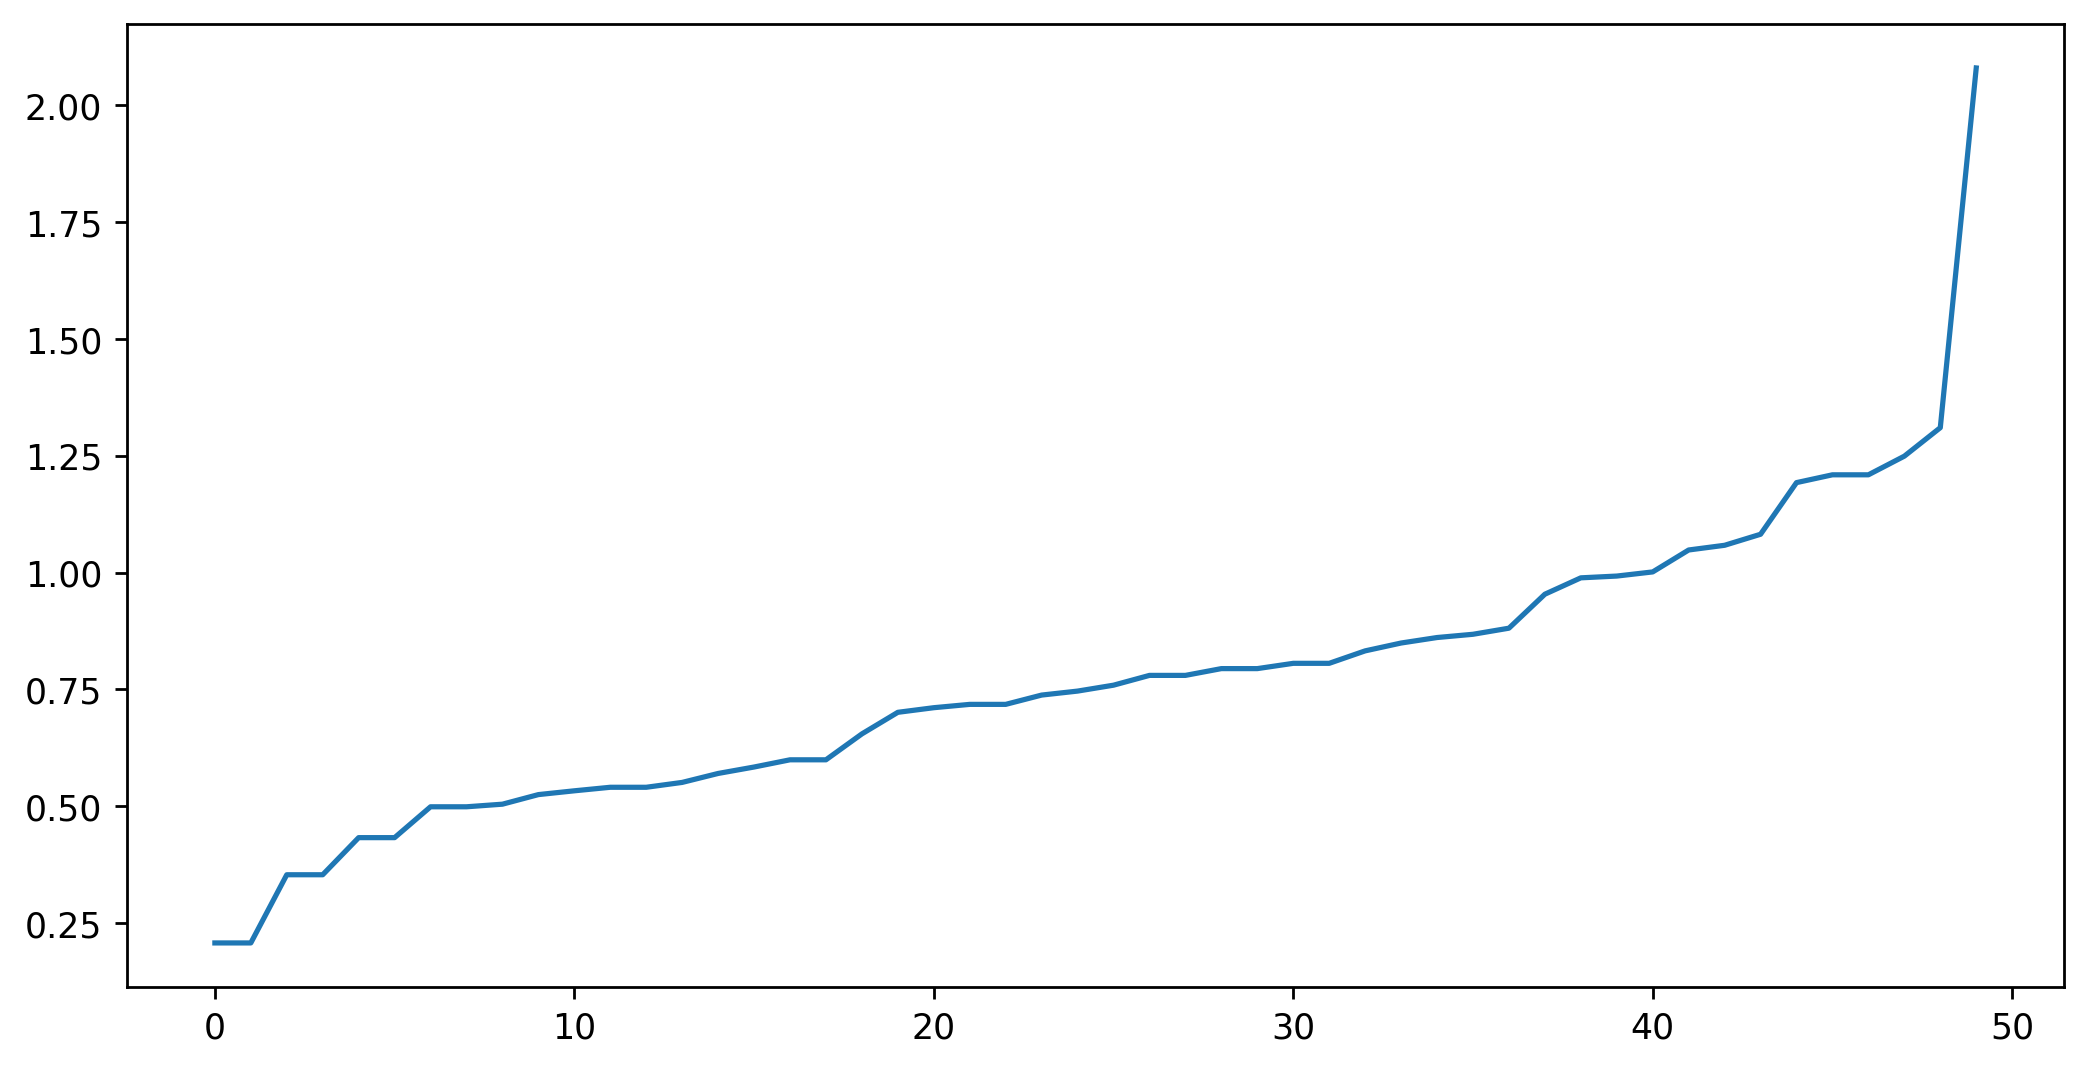

In [19]:
plt.plot(distance)

In [20]:
# creating another model

In [21]:
db=DBSCAN(eps=1.25,min_samples=8)
y=db.fit_predict(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [24]:
silhouette_score(x,y)

0.4047944502519567

In [25]:
df['cluster']=y

In [26]:
# Visualize DBScan

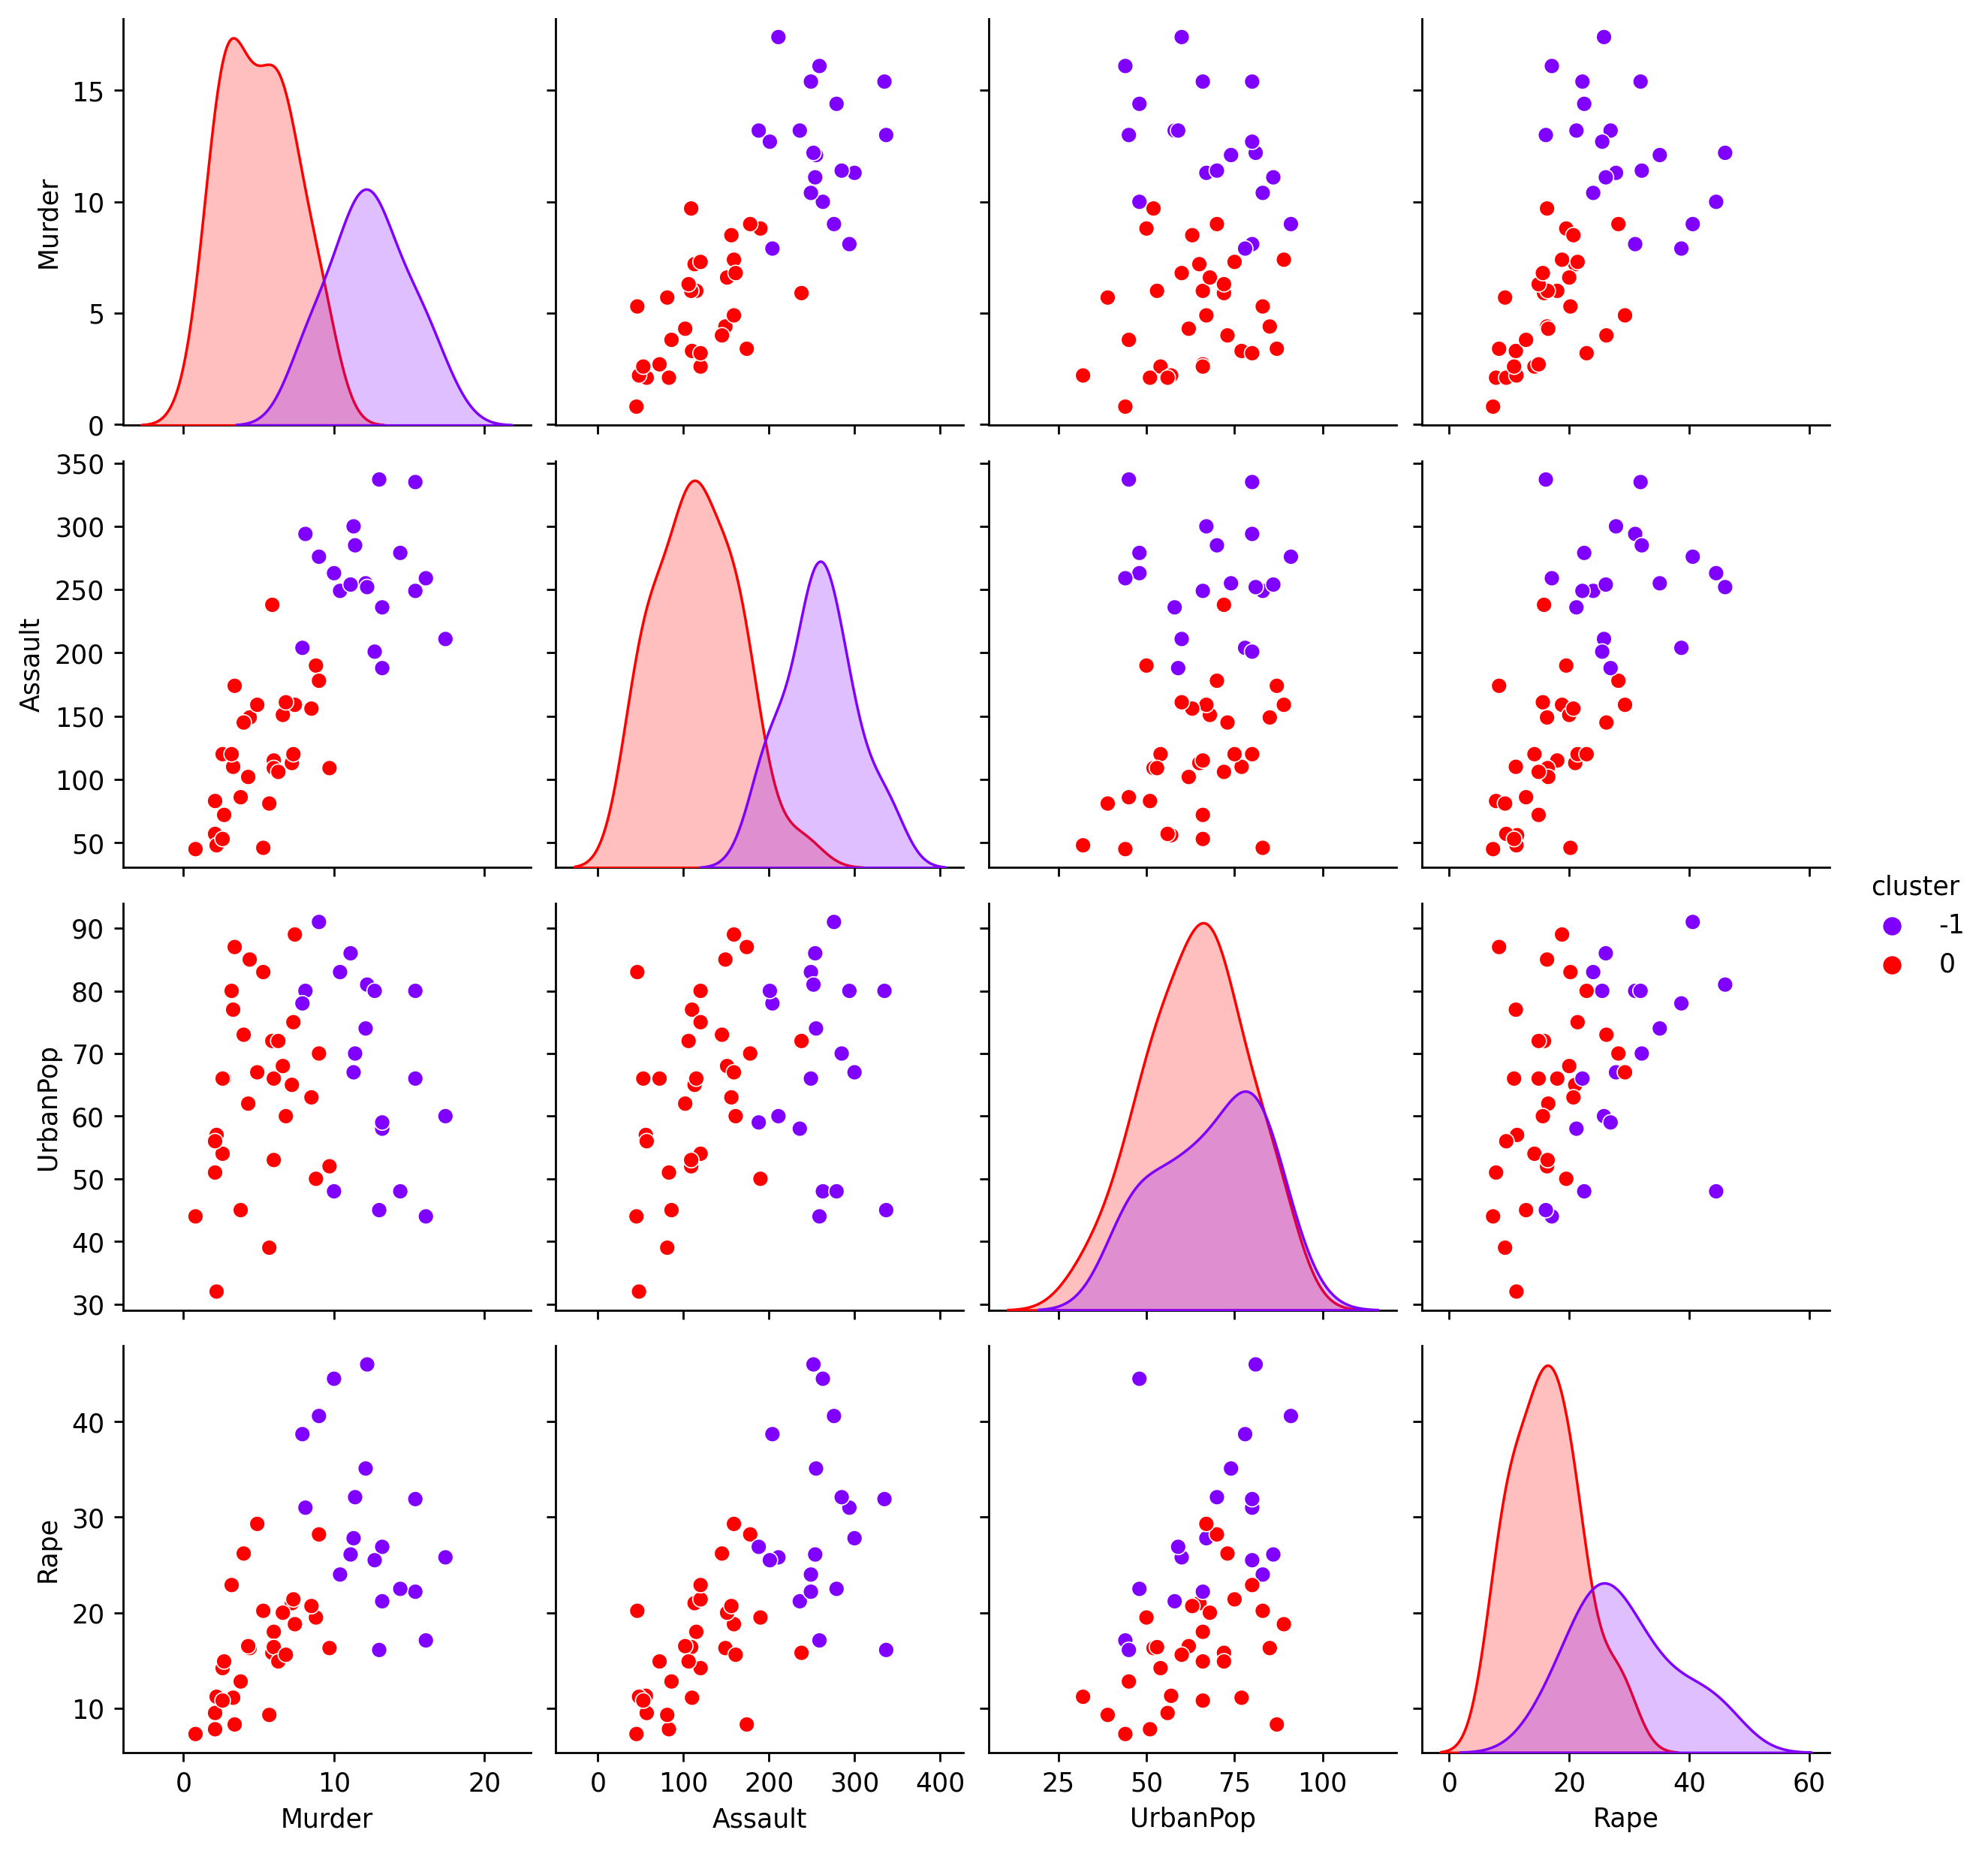

In [27]:
sb.pairplot(df,hue='cluster',palette='rainbow')

In [28]:
# plotting for separate column

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

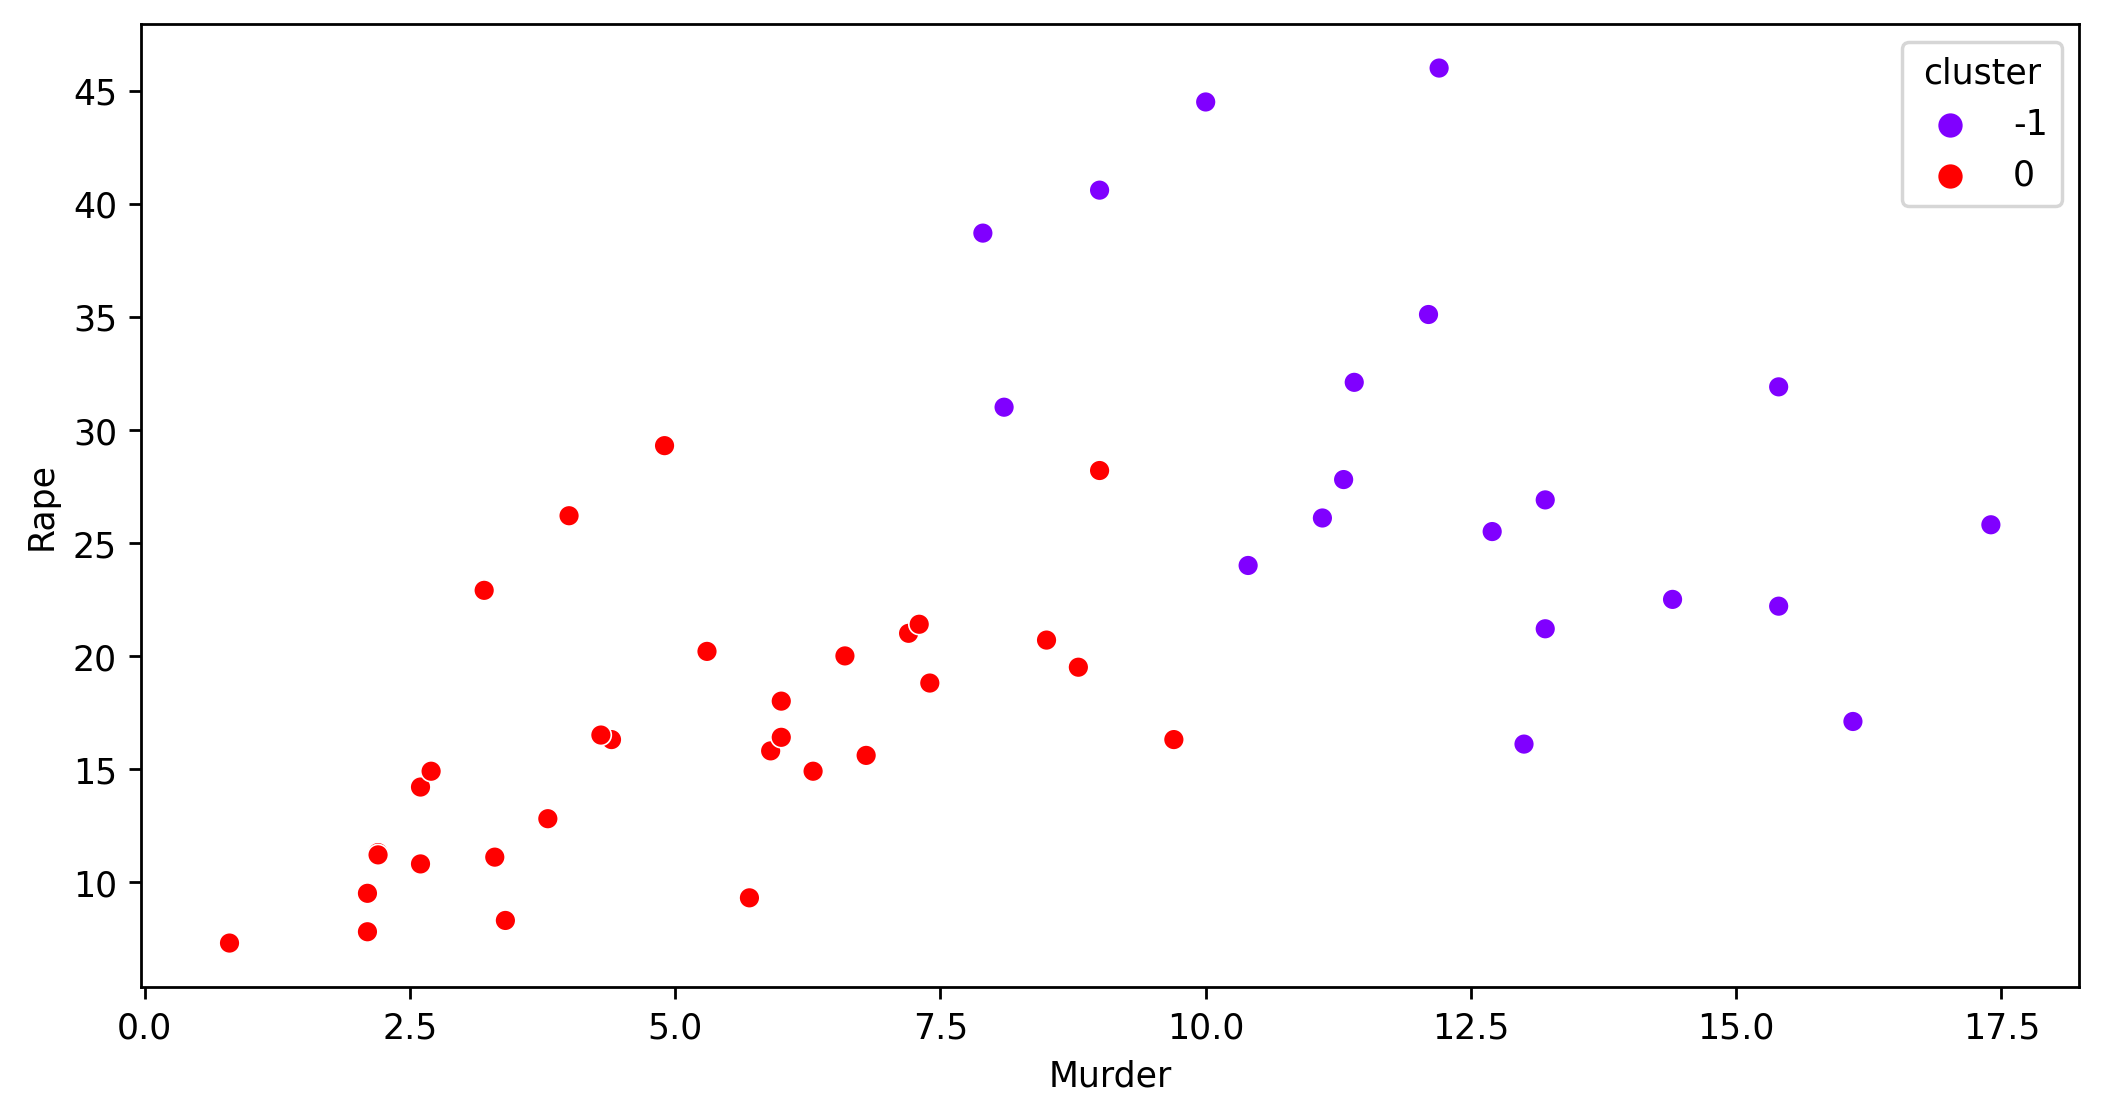

In [29]:
sb.scatterplot(df['Murder'],df['Rape'],hue=df['cluster'],palette='rainbow')